# LC3 DATA ANALYSIS

In this notebook we analize the relation of the compressive strength of LC3 with the clay used for its elaboration properties. For this purpose we utilize the dataset given by the Constructions Materials Laboratory at EPFL. This dataset consists of different measures of compressive strength for different types of LC3 cement in which the clay used for their ellaboration varies. We have also several clay properties measured and the objetive is finding the relation of the compressive strength (CS) with these for a deeper understanding of key elements in LC3 cement.

### Load libraries and data

In [1]:
from lc3_implementations import *

In [2]:
DATA_FULL_PATH   = './data/data_full.ods'

In [3]:
data_full_clay = load_full_data(DATA_FULL_PATH)

In [4]:
# Take kaolinite content
x = data_full_clay['Kaolinite_content'].values

# Take compression strengths
y1  = data_full_clay[ "day_1"].values
y3  = data_full_clay[ "day_3"].values
y7  = data_full_clay[ "day_7"].values
y28 = data_full_clay["day_28"].values
y90 = data_full_clay["day_90"].values

# Measures have missing values
x1 =   x[np.logical_not(np.isnan(y1))]
y1 = y1[np.logical_not(np.isnan(y1))]
x3 =   x[np.logical_not(np.isnan(y3))]
y3 = y3[np.logical_not(np.isnan(y3))]
x7 =   x[np.logical_not(np.isnan(y7))]
y7 = y7[np.logical_not(np.isnan(y7))]
x28 =   x[np.logical_not(np.isnan(y28))]
y28 = y28[np.logical_not(np.isnan(y28))]
x90 =   x[np.logical_not(np.isnan(y90))]
y90 = y90[np.logical_not(np.isnan(y90))]

# Take standard deviations
#z1  = data[ "STD_1D"].values
#z3  = data[ "STD_3D"].values
#z7  = data[ "STD_7D"].values
#z28 = data["STD_28D"].values
#z90 = data["STD_90D"].values

### Visualize data

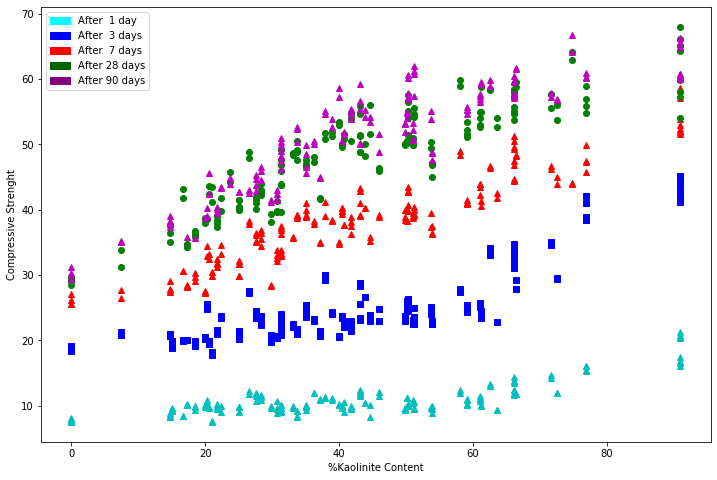

In [34]:
visualize_data(x1,y1,x3,y3,x7,y7,x28,y28,x90,y90)

# COMPRESSION STRENGTH (CS)

### Linear regression models

We have seen that the kaolinite content is the most predictive feature that we have. We are going to start creating simple linear regression models and then, following the appreciations obtained by visualizing the data, we are going to create non-linear models based on the kaolinite content for better fitting the data distribution as well as models with more features for avoiding data sparsification.

Two metrics are going to be extremely important here:
* **R square:** Is giving us a measurement of how good is our model (the closer to 1.0 the better). 
* **Validation score:** Is going to let us control overfitting. Improving R² means nothing if validation is worse. We'll use mean squared error with Leave One Out cross validation to estimate it.

#### Linear models based on the kaolinite content

f(x) = 7.2151302115054365 + 0.08614760554367056*x


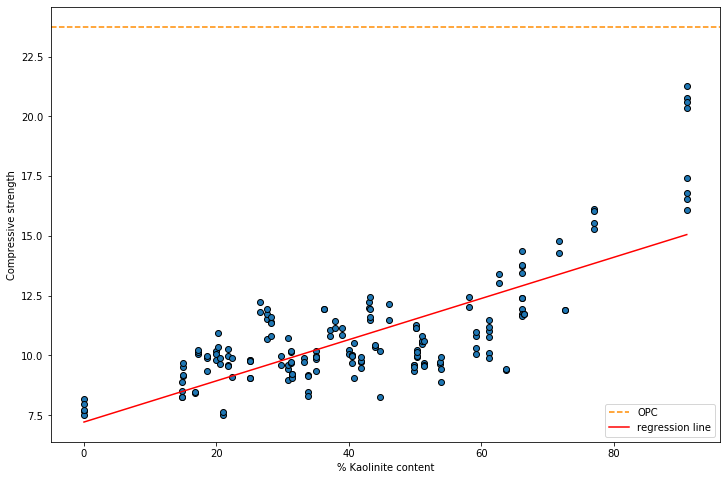

MSE: 2.4915430886381773
R^2: 0.5646399254172192


In [35]:
leave_one_out_validation(x1.reshape(-1,1), y1, 1)

f(x) = 15.121211259149108 + 0.23716658634072568*x


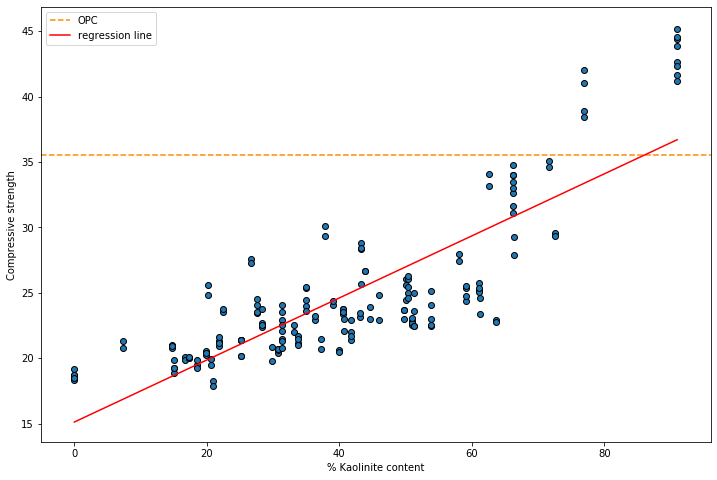

MSE: 11.0341564008828
R^2: 0.6930349113078271


In [36]:
leave_one_out_validation(x3.reshape(-1,1), y3, 3)

f(x) = 25.39778136256839 + 0.3033142394265772*x


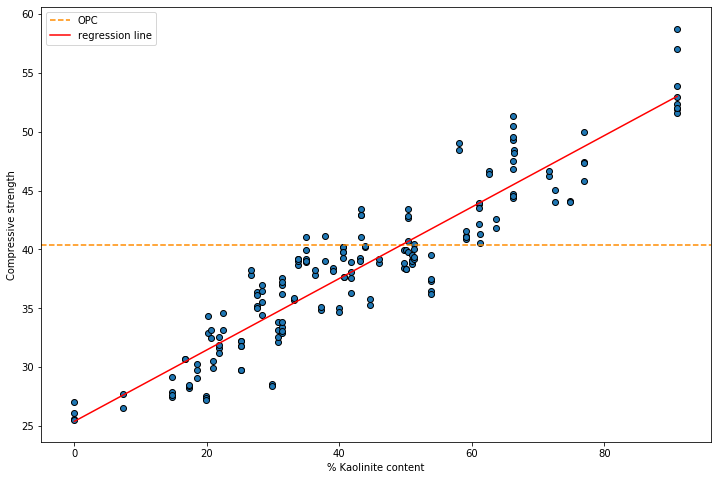

MSE: 6.644255365873272
R^2: 0.8564854462110307


In [37]:
leave_one_out_validation(x7.reshape(-1,1), y7, 7)

f(x) = 33.40789717800118 + 0.34830244551491557*x


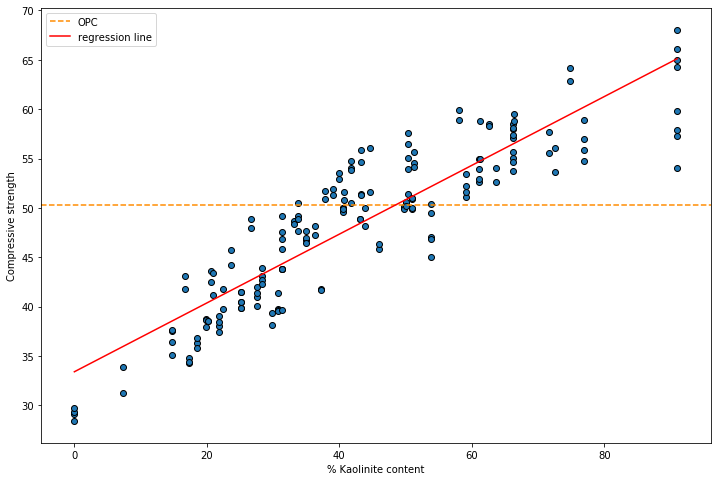

MSE: 12.565649838100718
R^2: 0.8083157374271702


In [38]:
leave_one_out_validation(x28.reshape(-1,1), y28, 28)

f(x) = 35.15977108923992 + 0.3609191616131711*x


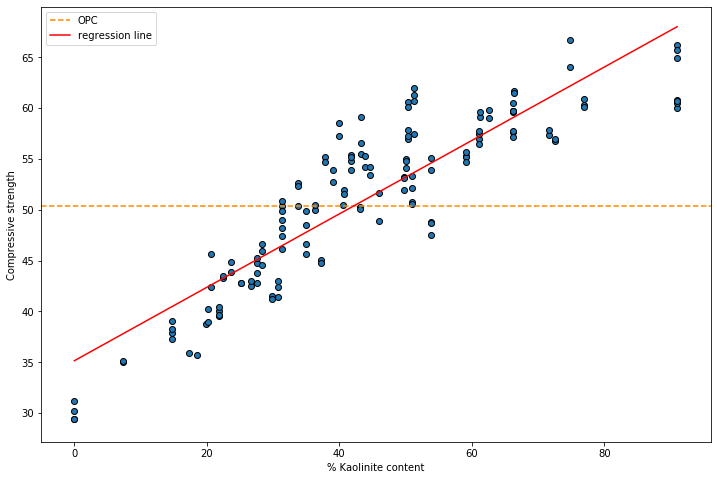

MSE: 14.004833215714463
R^2: 0.8026982663592178


In [39]:
leave_one_out_validation(x90.reshape(-1,1), y90, 90)

**First sight analysis:**

* There is few more we can improve at the 7th day using only the kaolinite content, data distribution is quite a straight line.
* For 1st and 3rd day the problem is more the sparsification of the points than the lack of expresivity of the model.
* For 28th and 90th day until 40% of kaolinite content the compression strength increases linearly and then estabilizes. Makes sense a non-linear model.
* It doesn't make sense in any model a degree 3 regression model, compression strength increases with kaolinite content.

#### Non-linear models based on the kaolinite content

In [40]:
# We add a column with caolinite content square
x1_2   = np.array([x1, x1**2]).T
x3_2   = np.array([x3, x3**2]).T
x7_2   = np.array([x7, x7**2]).T
x28_2   = np.array([x28, x28**2]).T
x90_2 = np.array([x90,x90*x90]).T

f(x) = 9.998251056521765 + -0.06491714026998263*x + 0.0016318856523339716*x^2


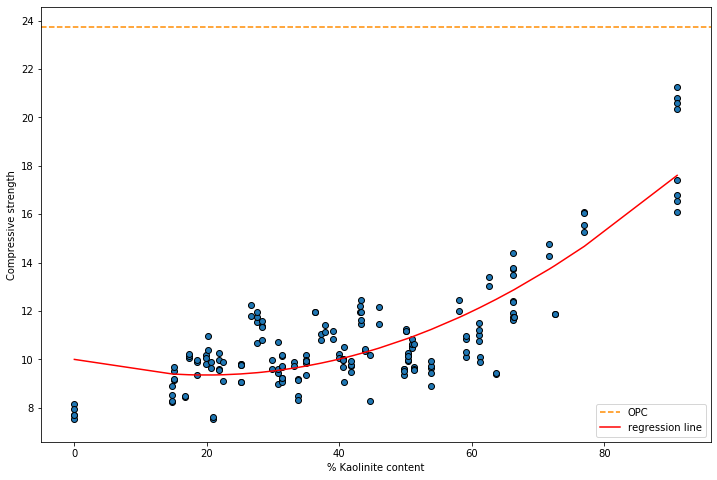

MSE: 1.725290915295299
R^2: 0.7051852343193981


In [41]:
leave_one_out_validation(x1_2, y1, 1)

f(x) = 21.34098034680555 + -0.10767035116734944*x + 0.003761734715400102*x^2


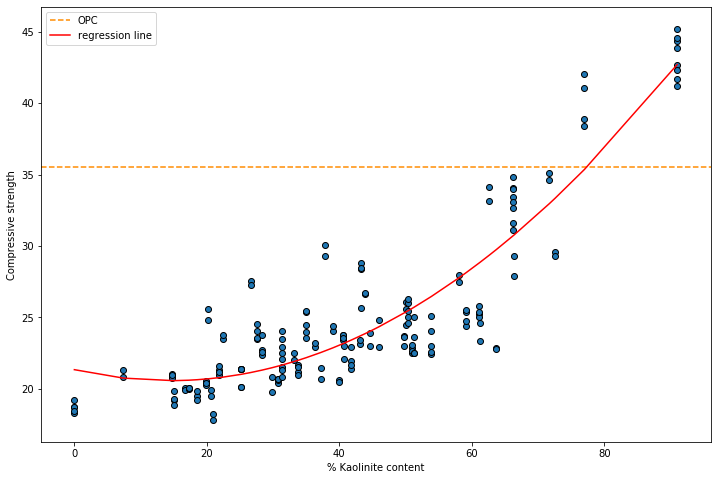

MSE: 6.604330186394199
R^2: 0.8159350339945067


In [42]:
leave_one_out_validation(x3_2, y3, 3)

f(x) = 25.107973754202362 + 0.31876870940954705*x + -0.00016491653466393151*x^2


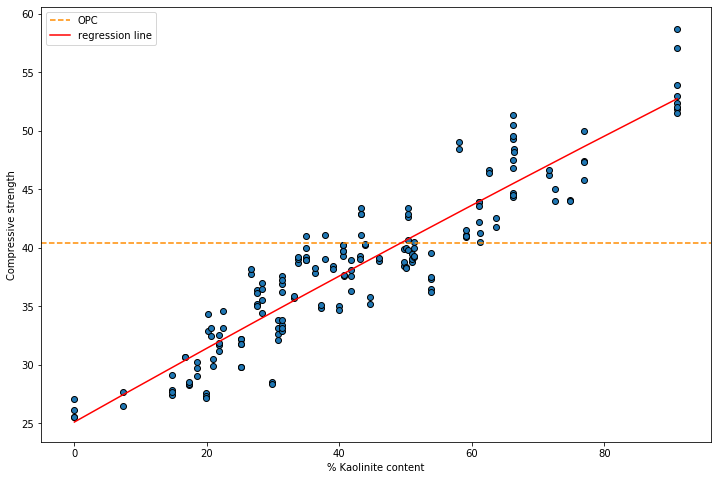

MSE: 6.702091011543721
R^2: 0.8566557822413999


In [43]:
leave_one_out_validation(x7_2, y7, 7)

f(x) = 28.30285876368551 + 0.6214581489820219*x + -0.0029158437157125175*x^2


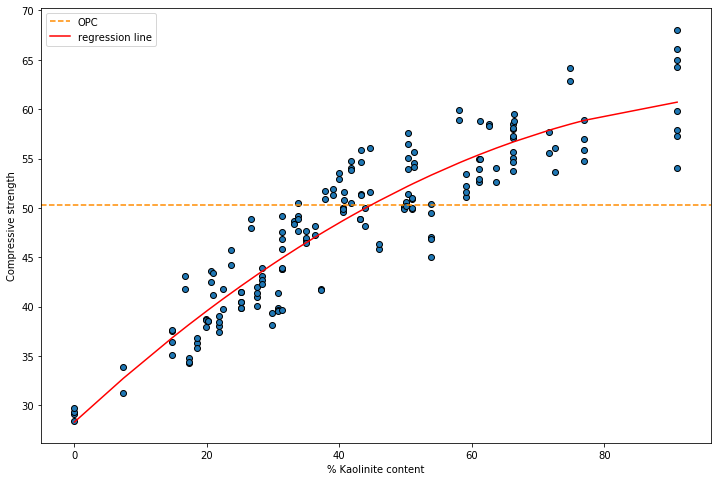

MSE: 10.225322846363746
R^2: 0.8459370555047918


In [44]:
leave_one_out_validation(x28_2, y28, 28)

f(x) = 28.56344254087434 + 0.7115727302703989*x + -0.00374350419658484*x^2


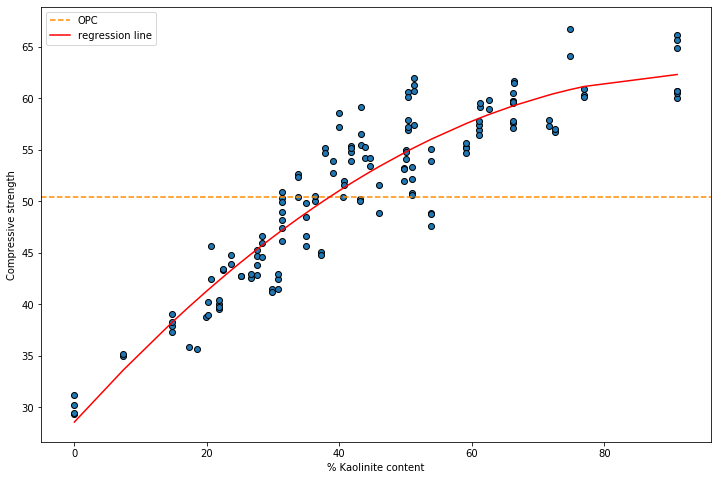

MSE: 9.56781501948048
R^2: 0.8654661130105779


In [45]:
leave_one_out_validation(x90_2, y90, 90)

**First sight analysis:**

* Expected results, better models obtained for 28th and 90th day compression strength obtained.
* We might be experiencing overfitting with this model for 1st and 3rd day measurements because we're not increasing the compressive strength with the increase of calonita for small contents.

### Feature selection

In [7]:
# Which features are realiable? Those with more than RELIABLE_THRESHOLD measurements
RELIABLE_THRESHOLD = 120

features = data_full_clay.columns[9:]
reliable_features = [f for f in features if data_full_clay[f].describe()[0] >= RELIABLE_THRESHOLD]

Highlight maximums of R2 in color Red and minimums of MSE in color green.

In [8]:
feature_selection(data_full_clay,reliable_features)

,day_1_mse,day_1_adjR2,day_3_mse,day_3_adjR2,day_7_mse,day_7_adjR2,day_28_mse,day_28_adjR2,day_90_mse,day_90_adjR2
Dv50,2.028221,0.712202,7.298346,0.827084,6.004504,0.870453,10.654685,0.832161,9.814299,0.856622
span,2.012409,0.715101,6.473783,0.847021,5.432408,0.882813,10.765298,0.831090,9.968816,0.856430
BET_specific_surface,2.038229,0.723705,6.937822,0.841305,5.994250,0.879186,10.195111,0.852749,8.528623,0.884891
SiO2,1.932340,0.699401,7.568200,0.801468,6.619773,0.850105,10.665902,0.832185,9.433228,0.860733
Al2O3,1.742867,0.722816,7.332177,0.806500,7.100194,0.826069,11.412707,0.788910,9.881335,0.821580
Fe2O3,1.732575,0.722268,7.223656,0.808332,6.860282,0.830835,10.936582,0.797468,9.658861,0.826288
CaO,1.305247,0.247710,6.433157,0.416220,6.385765,0.746721,12.122250,0.746250,11.814711,0.778068
MgO,1.542087,0.400156,7.546322,0.602195,5.467556,0.796044,10.585373,0.761403,9.541294,0.808707
Na2O,1.648089,0.406967,8.067627,0.605634,6.267286,0.777914,11.321750,0.760256,10.700517,0.797154
K2O,1.891251,0.682867,7.007512,0.788568,6.805210,0.842825,10.703203,0.831335,9.098826,0.864610


In [48]:
# Increasing the number of features it's even more clear why we can not rely on this features!
#feature_selection(data_full_clay, reliable_features, other_base_features=['D90'])
#feature_selection(data_full_clay, reliable_features, other_base_features=['BET_specific_surface'])
#feature_selection(data_full_clay, reliable_features, other_base_features=['BET_specific_surface','span'])

In [49]:
feature_selection(data_full_clay,features)

,day_1_mse,day_1_adjR2,day_3_mse,day_3_adjR2,day_7_mse,day_7_adjR2,day_28_mse,day_28_adjR2,day_90_mse,day_90_adjR2
Dv50,2.028221,0.712202,7.298346,0.827084,6.004504,0.870453,10.654685,0.832161,9.814299,0.856622
D10,1.772050,0.802296,5.847648,0.886372,5.829254,0.889892,9.326698,0.878414,8.259493,0.897535
D90,1.801187,0.798240,5.440216,0.893784,5.179746,0.903261,8.924699,0.883195,8.314796,0.898024
span,2.012409,0.715101,6.473783,0.847021,5.432408,0.882813,10.765298,0.831090,9.968816,0.856430
BET_specific_surface,2.038229,0.723705,6.937822,0.841305,5.994250,0.879186,10.195111,0.852749,8.528623,0.884891
SiO2,1.932340,0.699401,7.568200,0.801468,6.619773,0.850105,10.665902,0.832185,9.433228,0.860733
Al2O3,1.742867,0.722816,7.332177,0.806500,7.100194,0.826069,11.412707,0.788910,9.881335,0.821580
Fe2O3,1.732575,0.722268,7.223656,0.808332,6.860282,0.830835,10.936582,0.797468,9.658861,0.826288
CaO,1.305247,0.247710,6.433157,0.416220,6.385765,0.746721,12.122250,0.746250,11.814711,0.778068
MgO,1.542087,0.400156,7.546322,0.602195,5.467556,0.796044,10.585373,0.761403,9.541294,0.808707


In [50]:
# Increasing the number of features it's even more clear why we can not rely on this features!
#feature_selection(data_full_clay, features, other_base_features=['D90'])
#feature_selection(data_full_clay, features, other_base_features=['BET_specific_surface'])
#feature_selection(data_full_clay, features, other_base_features=['D10','D90','BET_specific_surface','SO3','MnO'])

Thanks to feature selection we can see that "D10", "D90", "span" and "BET_specific_surface" are features with a high predictive importance. However, we haven't enough data with D10 and D90 measurements to trust them. We are chosing then "span" and "BET_specific_surface" to create models together with the Kaolinite content. 

Can we continue adding features to our model? We can but we have to be aware of overfitting. The following cell helps us to decide wether adding another feature in complement to "span" or "BET_specific_surface" leads to overfitting.

In [23]:
#feature_selection(data_full_clay, reliable_features, other_base_features=['BET_specific_surface'])
#feature_selection(data_full_clay, reliable_features, other_base_features=['span'])

### Linear regression models based on the kaolinite content and other features

Following the results obtained in the feature selection part, here we are creating and analyzing the models done with the kaolinite conent (in degree one and two) as well as other feature.

#### Day 1

In [12]:
# Day 1
get_model_summary(create_r_formula(1,'BET_specific_surface'),get_model_data(data_full_clay, 'BET_specific_surface','day_1', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_1   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     115.4
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           3.13e-36
Time:                        18:58:45   Log-Likelihood:                 116.96
No. Observations:                 132   AIC:                            -225.9
Df Residuals:                     128   BIC:                            -214.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1445      0.032      4.456      0.000       0.080       0.209
Kaolinite_content           -0.2789      0.142     -1.957      0.052      -0.561       0.003
Kaolinite_content_square     0.8748      0.131      6.664      0.000       0.615       1.135
BET_specific_surface        -0.0063      0.043     -0.146      0.884      -0.091       0.079
==============================================================================
Omnibus:                        1.367   Durbin-Watson:                   0.850
Prob(Omnibus):                  0.505   Jarque-Bera (JB):                1.450
Skew:                           0.209   Prob(JB):                        0.484
Kurtosis:                       2.701   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Day 1
get_model_summary(create_r_formula(1,'span'),get_model_data(data_full_clay, 'span','day_1', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_1   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     116.5
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           2.80e-37
Time:                        18:58:58   Log-Likelihood:                 124.10
No. Observations:                 139   AIC:                            -240.2
Df Residuals:                     135   BIC:                            -228.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1494      0.032      4.665      0.000       0.086       0.213
Kaolinite_content           -0.3938      0.137     -2.878      0.005      -0.664      -0.123
Kaolinite_content_square     0.9675      0.127      7.596      0.000       0.716       1.219
span                         0.0573      0.043      1.344      0.181      -0.027       0.142
==============================================================================
Omnibus:                        0.979   Durbin-Watson:                   0.780
Prob(Omnibus):                  0.613   Jarque-Bera (JB):                1.068
Skew:                           0.189   Prob(JB):                        0.586
Kurtosis:                       2.795   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Day 3

In [14]:
# Day 3
get_model_summary(create_r_formula(3,'BET_specific_surface'),get_model_data(data_full_clay, 'BET_specific_surface','day_3', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_3   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     234.3
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           5.20e-52
Time:                        18:58:59   Log-Likelihood:                 125.80
No. Observations:                 133   AIC:                            -243.6
Df Residuals:                     129   BIC:                            -232.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1169      0.029      4.019      0.000       0.059       0.174
Kaolinite_content           -0.2869      0.131     -2.190      0.030      -0.546      -0.028
Kaolinite_content_square     1.0961      0.122      9.015      0.000       0.856       1.337
BET_specific_surface        -0.0236      0.040     -0.582      0.561      -0.104       0.056
==============================================================================
Omnibus:                        1.021   Durbin-Watson:                   0.961
Prob(Omnibus):                  0.600   Jarque-Bera (JB):                0.603
Skew:                           0.081   Prob(JB):                        0.740
Kurtosis:                       3.287   Cond. No.                         25.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Day 3
get_model_summary(create_r_formula(3,'span'),get_model_data(data_full_clay, 'span','day_3', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_3   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     253.9
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           4.56e-55
Time:                        18:58:59   Log-Likelihood:                 135.76
No. Observations:                 138   AIC:                            -263.5
Df Residuals:                     134   BIC:                            -251.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.1150      0.029      3.931      0.000       0.057       0.173
Kaolinite_content           -0.5741      0.125     -4.593      0.000      -0.821      -0.327
Kaolinite_content_square     1.3381      0.116     11.505      0.000       1.108       1.568
span                         0.1874      0.039      4.809      0.000       0.110       0.264
==============================================================================
Omnibus:                        6.546   Durbin-Watson:                   0.971
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                6.929
Skew:                          -0.359   Prob(JB):                       0.0313
Kurtosis:                       3.830   Cond. No.                         26.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Day 7

In [16]:
# Day 7
get_model_summary(create_r_formula(7,'BET_specific_surface'),get_model_data(data_full_clay, 'BET_specific_surface','day_7', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_7   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     311.5
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           8.22e-58
Time:                        18:58:59   Log-Likelihood:                 156.71
No. Observations:                 129   AIC:                            -305.4
Df Residuals:                     125   BIC:                            -294.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0079      0.024      0.324      0.746      -0.040       0.056
Kaolinite_content            0.8748      0.105      8.329      0.000       0.667       1.083
Kaolinite_content_square    -0.0499      0.096     -0.520      0.604      -0.240       0.140
BET_specific_surface        -0.0133      0.031     -0.428      0.670      -0.075       0.048
==============================================================================
Omnibus:                        9.062   Durbin-Watson:                   1.011
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                6.256
Skew:                           0.404   Prob(JB):                       0.0438
Kurtosis:                       2.286   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Day 7
get_model_summary(create_r_formula(7,'span'),get_model_data(data_full_clay, 'span','day_7', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  day_7   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     335.0
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           5.87e-61
Time:                        18:59:00   Log-Likelihood:                 169.35
No. Observations:                 134   AIC:                            -330.7
Df Residuals:                     130   BIC:                            -319.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0051      0.025      0.206      0.837      -0.044       0.054
Kaolinite_content            0.6844      0.100      6.831      0.000       0.486       0.883
Kaolinite_content_square     0.1133      0.092      1.237      0.218      -0.068       0.294
span                         0.1333      0.030      4.489      0.000       0.075       0.192
==============================================================================
Omnibus:                        0.159   Durbin-Watson:                   1.084
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.324
Skew:                          -0.034   Prob(JB):                        0.850
Kurtosis:                       2.769   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Day 28

In [18]:
# Day 28
get_model_summary(create_r_formula(28,'BET_specific_surface'),get_model_data(data_full_clay, 'BET_specific_surface','day_28', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_28   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     248.1
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.90e-52
Time:                        18:59:04   Log-Likelihood:                 145.99
No. Observations:                 129   AIC:                            -284.0
Df Residuals:                     125   BIC:                            -272.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0095      0.026      0.359      0.720      -0.043       0.062
Kaolinite_content            1.4970      0.115     13.047      0.000       1.270       1.724
Kaolinite_content_square    -0.6937      0.105     -6.600      0.000      -0.902      -0.486
BET_specific_surface        -0.0344      0.034     -1.013      0.313      -0.101       0.033
==============================================================================
Omnibus:                        3.566   Durbin-Watson:                   1.352
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                2.148
Skew:                           0.030   Prob(JB):                        0.342
Kurtosis:                       2.371   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# Day 28
get_model_summary(create_r_formula(28,'span'),get_model_data(data_full_clay, 'span','day_28', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_28   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     219.1
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           1.19e-50
Time:                        18:59:04   Log-Likelihood:                 147.77
No. Observations:                 134   AIC:                            -287.5
Df Residuals:                     130   BIC:                            -276.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0192      0.029      0.667      0.506      -0.038       0.076
Kaolinite_content            1.3059      0.118     11.074      0.000       1.073       1.539
Kaolinite_content_square    -0.5294      0.108     -4.910      0.000      -0.743      -0.316
span                         0.0597      0.035      1.690      0.093      -0.010       0.129
==============================================================================
Omnibus:                        2.146   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.570
Skew:                          -0.003   Prob(JB):                        0.456
Kurtosis:                       2.470   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Day 90

In [20]:
# Day 90
get_model_summary(create_r_formula(90,'BET_specific_surface'),get_model_data(data_full_clay, 'BET_specific_surface','day_90', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_90   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     290.6
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           4.15e-52
Time:                        18:59:07   Log-Likelihood:                 130.46
No. Observations:                 114   AIC:                            -252.9
Df Residuals:                     110   BIC:                            -242.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0202      0.027     -0.742      0.460      -0.074       0.034
Kaolinite_content            1.8481      0.120     15.369      0.000       1.610       2.086
Kaolinite_content_square    -0.9367      0.110     -8.551      0.000      -1.154      -0.720
BET_specific_surface        -0.0326      0.037     -0.889      0.376      -0.105       0.040
==============================================================================
Omnibus:                        1.753   Durbin-Watson:                   1.157
Prob(Omnibus):                  0.416   Jarque-Bera (JB):                1.618
Skew:                           0.181   Prob(JB):                        0.445
Kurtosis:                       2.542   Cond. No.                         26.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Day 90
get_model_summary(create_r_formula(90,'span'),get_model_data(data_full_clay, 'span','day_90', normalize=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 day_90   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     235.6
Date:                Mon, 14 Dec 2020   Prob (F-statistic):           6.18e-49
Time:                        18:59:07   Log-Likelihood:                 127.34
No. Observations:                 119   AIC:                            -246.7
Df Residuals:                     115   BIC:                            -235.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.0098      0.031     -0.312      0.756      -0.072       0.052
Kaolinite_content            1.7392      0.126     13.830      0.000       1.490       1.988
Kaolinite_content_square    -0.8471      0.115     -7.341      0.000      -1.076      -0.619
span                         0.0006      0.040      0.016      0.987      -0.078       0.079
==============================================================================
Omnibus:                        0.174   Durbin-Watson:                   1.081
Prob(Omnibus):                  0.917   Jarque-Bera (JB):                0.018
Skew:                           0.019   Prob(JB):                        0.991
Kurtosis:                       3.046   Cond. No.                         26.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Confidence analysis for the models

We know our model (function depending on the features provided) as well as some metrics to have an idea of how well our model fits our data (R2) and how is it behaving in practice with new data (MSE). The objetive of this section is to provide a more mathematical analysis of the confidence we can expect from our models.

In [62]:
# TODO!

f(x) = 9.998251056521733 + -0.06491714026998285*x + 0.001631885652333949*x^2


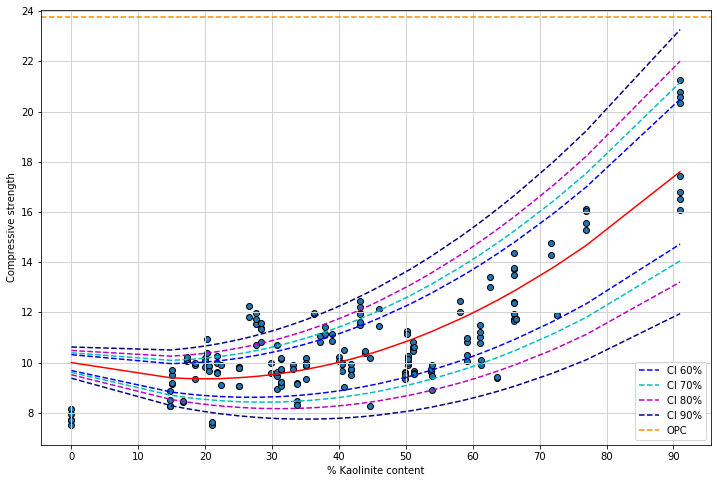

MSE: 1.725290915295299
R^2: 0.7051852343193981



In [63]:
plot_confidence_intervals(get_model_data_kaolinite(data_full_clay, 'day_1'), 1)

In [64]:
#deviated_points_detection(data_full_clay, 1)

In [65]:
# TODO!

f(x) = 21.34098034680562 + -0.10767035116735059*x + 0.003761734715400147*x^2


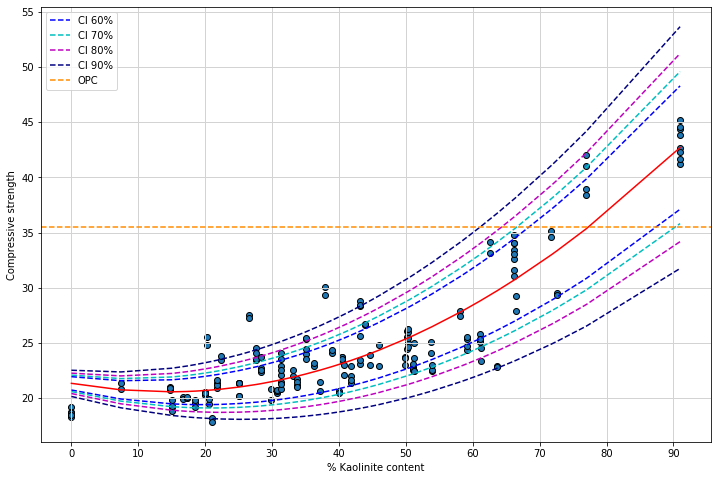

MSE: 6.604330186394199
R^2: 0.8159350339945067



In [66]:
plot_confidence_intervals(get_model_data_kaolinite(data_full_clay, 'day_3'), 3)

In [67]:
#deviated_points_detection(data_full_clay, 3)

f(x) = 25.107973754202256 + 0.31876870940954927*x + -0.0001649165346638687*x^2


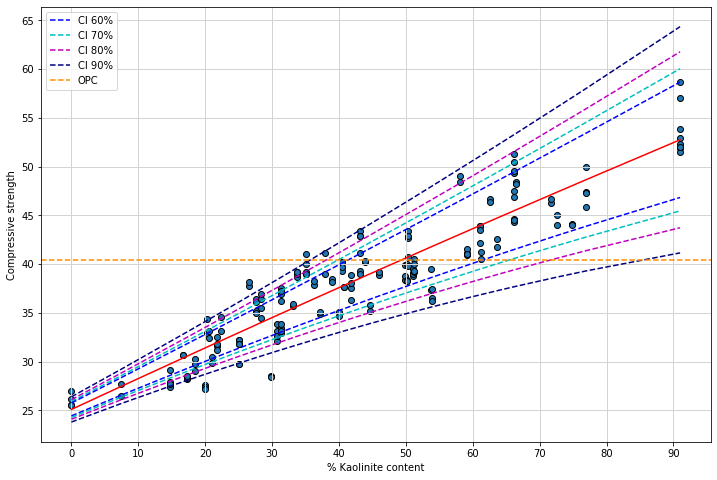

MSE: 6.702091011543721
R^2: 0.8566557822413999



In [68]:
plot_confidence_intervals(get_model_data_kaolinite(data_full_clay, 'day_7'), 7)

In [69]:
#deviated_points_detection(data_full_clay, 7)

f(x) = 28.302858763684853 + 0.6214581489820288*x + -0.002915843715712488*x^2


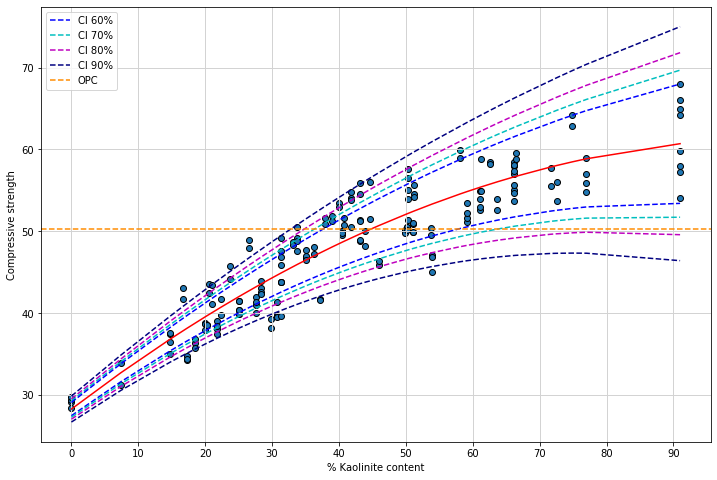

MSE: 10.225322846363746
R^2: 0.8459370555047918



In [70]:
plot_confidence_intervals(get_model_data_kaolinite(data_full_clay, 'day_28'), 28)

In [71]:
#deviated_points_detection(data_full_clay, 28)

f(x) = 28.563442540875243 + 0.7115727302703981*x + -0.0037435041965847397*x^2


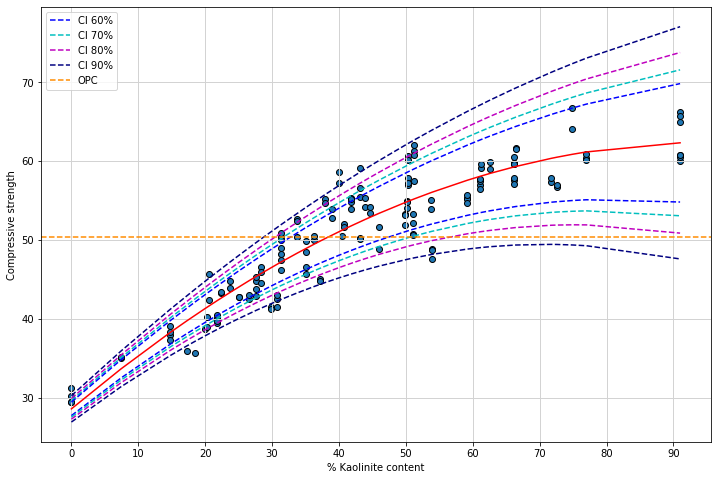

MSE: 9.56781501948048
R^2: 0.8654661130105779



In [72]:
plot_confidence_intervals(get_model_data_kaolinite(data_full_clay, 'day_90'), 90)

In [73]:
#deviated_points_detection(data_full_clay, 90)

### References:

* How to deal with small datasets:\
https://medium.com/rants-on-machine-learning/what-to-do-with-small-data-d253254d1a89

* Feature engineering: \
https://machinelearningmastery.com/discover-feature-engineering-how-to-engineer-features-and-how-to-get-good-at-it/

* Feature selection: \
https://en.wikipedia.org/wiki/Feature_selection \
https://machinelearningmastery.com/an-introduction-to-feature-selection/ \
https://machinelearningmastery.com/feature-selection-machine-learning-python/ \
https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/ \
https://machinelearningmastery.com/calculate-feature-importance-with-python/

* Linear regression with python: \
https://realpython.com/linear-regression-in-python/ 

* Confidence estimation: \
https://www.puneetarora2000.com/2020/01/data-interpretation-understanding-ols.html \
https://medium.com/@jyotiyadav99111/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01 \
https://www.statsmodels.org/stable/regression.html \

